# K-Means Project (Unsupervised Learning)

## Importing all libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os

## Loading, inspecting and preparing data

> We load the California Housing dataset and select only the columns relevant for clustering: `Latitude`, `Longitude`, and `MedInc` (median income).
- This step is essential to focus on geographic and socioeconomic features, which will allow us to group houses in a way that reflects both their location and the economic conditions of the region.

In [5]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)

df = df[['Latitude', 'Longitude', 'MedInc']]
print(df.head())
print(df.info())


   Latitude  Longitude  MedInc
0     37.88    -122.23  8.3252
1     37.86    -122.22  8.3014
2     37.85    -122.24  7.2574
3     37.85    -122.25  5.6431
4     37.85    -122.25  3.8462
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB
None


> We print the dataframe shape, head, and info, confirming the data loaded correctly and contains no missing values.

> As we can observer, the dataset contains **20,640 rows** and **3 columns**: latitude, longitude, and median income.
- Thankfully, there are no missing values; all entries are valid floating-point numbers.
- The first few rows confirm the data includes precise geographic coordinates and a range of median incomes.


## Train/Test splitting

> After everything was loaded successfully, we will continue with the splitting of the data. I'm using a 80/20 split (like always)

In [6]:
X = df.copy()
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

Train size: 16512 Test size: 4128


> The splitting was successful. We have a train size of ***16512*** data points, and a test size of ***4128*** data points.

##  Building K-Means Clustering Model

  
> I'm using K-Means, an unsupervised learning algorithm, to automatically group houses into 6 clusters based on latitude, longitude, and median income.
- The model discovers underlying structure in the data without pre-existing labels, assigning each house to the nearest cluster centroid.
- Adding the cluster assignments as a new column allows us to analyze and visualize how the data was grouped and to use these new "labels" in later supervised learning.


In [7]:
kmeans = KMeans(n_clusters=6, random_state=42)
X_train['cluster'] = kmeans.fit_predict(X_train[['Latitude', 'Longitude', 'MedInc']])

print("Cluster labels assigned:\n", X_train['cluster'].value_counts())

Cluster labels assigned:
 cluster
3    4368
5    4356
1    3807
0    2455
2    1280
4     246
Name: count, dtype: int64


> After running the code, here are the results.
- The houses were distributed across 6 clusters of varying sizes:
  - Cluster 3: **4,368 houses**
  - Cluster 5: **4,356 houses**
  - Cluster 1: **3,807 houses**
  - Cluster 0: **2,455 houses**
  - Cluster 2: **1,280 houses**
  - Cluster 4: **246 houses**
- Most clusters are balanced, but cluster 4 is much smaller, suggesting it may represent a more unique or distinct region or group of houses (possibly a geographic or income outlier).
- These clusters represent distinct groupings in terms of location and/or income, which can now be analyzed and used for further prediction tasks.

> Now, the next step is to plot these clusters. 

### Plotting clusters

> We plot each house’s geographic coordinates (`Longitude`, `Latitude`), coloring them by their assigned cluster.
- This visual check helps us understand how the K-Means algorithm has grouped the houses spatially, and if the clusters align with meaningful geographic or regional boundaries.
- Adding a colorbar/legend makes it easy for us to distinguish between clusters.

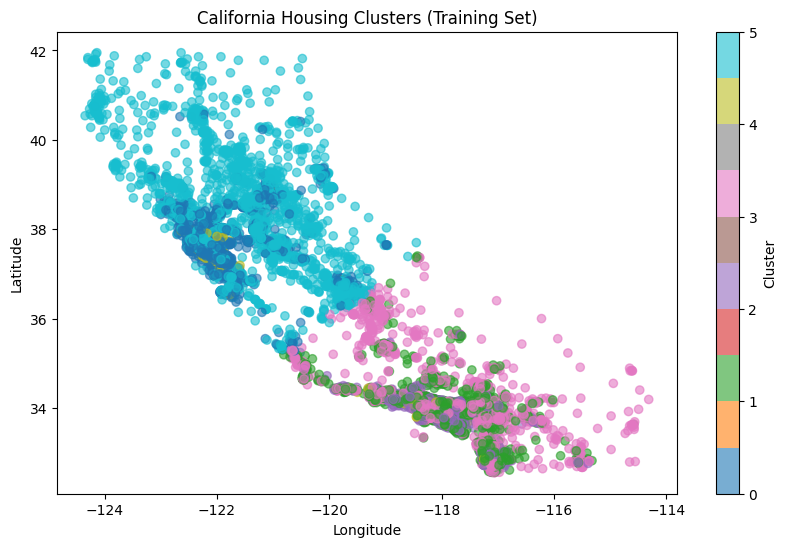

In [8]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_train['Longitude'], X_train['Latitude'],
    c=X_train['cluster'], cmap='tab10', alpha=0.6
)
plt.colorbar(scatter, ticks=range(6), label='Cluster')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Clusters (Training Set)")
plt.show()

> The clusters show clear geographic segmentation across California.  
  - Each color represents a different cluster; points are distributed along the recognizable shape of the state.
> The tightness and spread of each cluster reflect both **location** and **median income** differences.
- The smallest cluster (with far fewer points) may represent an outlier region—perhaps an affluent or isolated area.
- This result validates that our clustering reflects real-world geographic and socioeconomic divisions.

## Predicting Clusters for Test Set and Plot

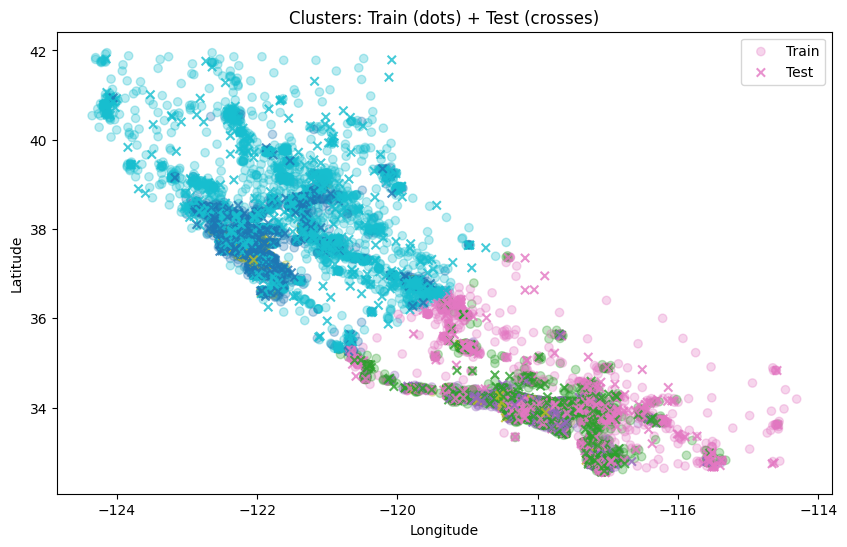

In [9]:
X_test['cluster'] = kmeans.predict(X_test[['Latitude', 'Longitude', 'MedInc']])

plt.figure(figsize=(10, 6))
plt.scatter(
    X_train['Longitude'], X_train['Latitude'],
    c=X_train['cluster'], cmap='tab10', alpha=0.3, label='Train'
)
plt.scatter(
    X_test['Longitude'], X_test['Latitude'],
    c=X_test['cluster'], cmap='tab10', marker='x', alpha=0.8, label='Test'
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters: Train (dots) + Test (crosses)")
plt.legend()
plt.show()

## Training a Supervised Classification Model

In [10]:
X_train_class = X_train[['Latitude', 'Longitude', 'MedInc']]
y_train_class = X_train['cluster']
X_test_class = X_test[['Latitude', 'Longitude', 'MedInc']]
y_test_class = X_test['cluster']

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)
y_pred = clf.predict(X_test_class)

print("Classification report:\n", classification_report(y_test_class, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test_class, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128

Confusion matrix:
 [[ 558    1    0    0    0    2]
 [   0  982    0    1    0    0]
 [   0    0  298    0    1    0]
 [   0    2    0 1107    0    2]
 [   0    0    2    0   60    0]
 [   3    2    0    2    0 1105]]


## Saving both models

In [11]:
os.makedirs('models', exist_ok=True)
joblib.dump(kmeans, 'models/kmeans_housing.pkl')
joblib.dump(clf, 'models/rf_cluster_classifier.pkl')
print("Both models saved in 'models/' folder.")

Both models saved in 'models/' folder.
